In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv(r'C:\Users\apopalzi\Documents\git\apf\datasets\fraud\fraud_detection_classification\data\card_transdata.csv')

In [3]:
df.head()

distance_from_home  distance_from_last_transaction  \
0           57.877857                        0.311140   
1           10.829943                        0.175592   
2            5.091079                        0.805153   
3            2.247564                        5.600044   
4           44.190936                        0.566486   

   ratio_to_median_purchase_price  repeat_retailer  used_chip  \
0                        1.945940              1.0        1.0   
1                        1.294219              1.0        0.0   
2                        0.427715              1.0        0.0   
3                        0.362663              1.0        1.0   
4                        2.222767              1.0        1.0   

   used_pin_number  online_order  fraud  
0              0.0           0.0    0.0  
1              0.0           0.0    0.0  
2              0.0           1.0    0.0  
3              0.0           1.0    0.0  
4              0.0           1.0    0.0

# EDA

In [4]:
df.isna().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [5]:
df.describe()

distance_from_home  distance_from_last_transaction  \
count      1000000.000000                  1000000.000000   
mean            26.628792                        5.036519   
std             65.390784                       25.843093   
min              0.004874                        0.000118   
25%              3.878008                        0.296671   
50%              9.967760                        0.998650   
75%             25.743985                        3.355748   
max          10632.723672                    11851.104565   

       ratio_to_median_purchase_price  repeat_retailer       used_chip  \
count                  1000000.000000   1000000.000000  1000000.000000   
mean                         1.824182         0.881536        0.350399   
std                          2.799589         0.323157        0.477095   
min                          0.004399         0.000000        0.000000   
25%                          0.475673         1.000000        0.000000   
50%                          0.997717         1.000000        0.000000   
75%                          2.096370         1.000000        1.000000   
max                        267.802942         1.000000        1.000000   

       used_pin_number    online_order           fraud  
count   1000000.000000  1000000.000000  1000000.000000  
mean          0.100608        0.650552        0.087403  
std           0.300809        0.476796        0.282425  
min           0.000000        0.000000        0.000000  
25%           0.000000        0.000000        0.000000  
50%           0.000000        1.000000        0.000000  
75%           0.000000        1.000000        0.000000  
max           1.000000        1.000000        1.000000

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


<AxesSubplot:xlabel='fraud', ylabel='count'>

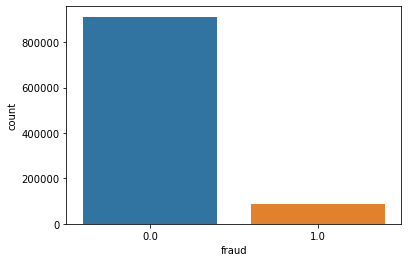

In [7]:
sns.countplot(data = df, x= 'fraud')

Data is unbalanced - needs to be resampled

<AxesSubplot:>

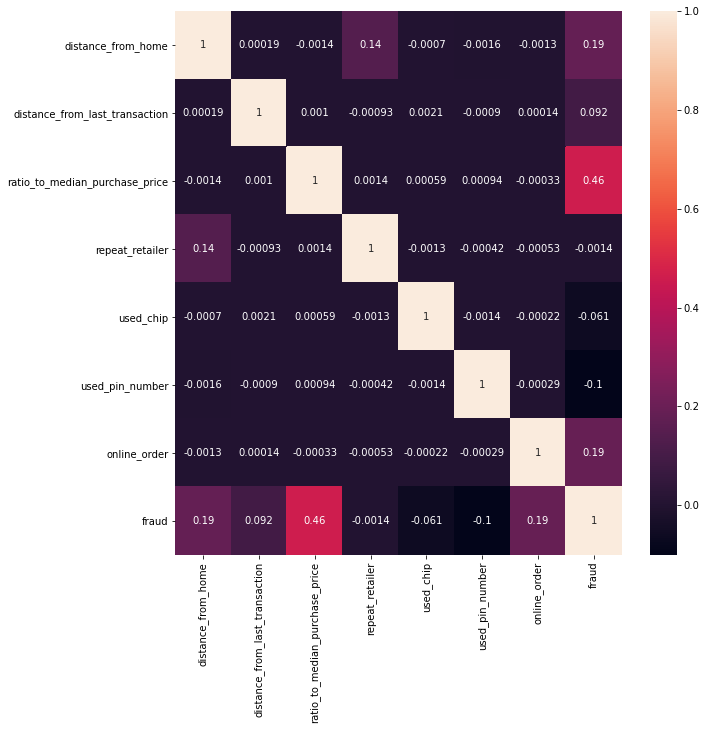

In [8]:
ax,fig = plt.subplots(figsize = (10,10))
sns.heatmap(df.corr(),annot = True)

In [9]:
fraud_1 = df[df['fraud']==1]
fraud_0 = df[df['fraud']==0]

In [10]:
fraud_1.describe()

distance_from_home  distance_from_last_transaction  \
count        87403.000000                    87403.000000   
mean            66.261876                       12.712185   
std            134.391608                       47.997697   
min              0.025847                        0.000407   
25%              4.585729                        0.328199   
50%             15.454219                        1.157631   
75%            101.110104                        4.598504   
max          10632.723672                     2160.499922   

       ratio_to_median_purchase_price  repeat_retailer     used_chip  \
count                    87403.000000     87403.000000  87403.000000   
mean                         6.006323         0.880119      0.256399   
std                          5.564320         0.324825      0.436647   
min                          0.011966         0.000000      0.000000   
25%                          3.500270         1.000000      0.000000   
50%                          5.071294         1.000000      0.000000   
75%                          7.331222         1.000000      1.000000   
max                        266.689692         1.000000      1.000000   

       used_pin_number  online_order    fraud  
count     87403.000000  87403.000000  87403.0  
mean          0.003123      0.946318      1.0  
std           0.055801      0.225391      0.0  
min           0.000000      0.000000      1.0  
25%           0.000000      1.000000      1.0  
50%           0.000000      1.000000      1.0  
75%           0.000000      1.000000      1.0  
max           1.000000      1.000000      1.0

In [11]:
fraud_0.describe()

distance_from_home  distance_from_last_transaction  \
count       912597.000000                   912597.000000   
mean            22.832976                        4.301391   
std             52.828655                       22.472359   
min              0.004874                        0.000118   
25%              3.828942                        0.293859   
50%              9.673847                        0.985074   
75%             24.158057                        3.268578   
max           8777.136420                    11851.104565   

       ratio_to_median_purchase_price  repeat_retailer      used_chip  \
count                   912597.000000    912597.000000  912597.000000   
mean                         1.423642         0.881672       0.359402   
std                          1.946152         0.322997       0.479825   
min                          0.004399         0.000000       0.000000   
25%                          0.449768         1.000000       0.000000   
50%                          0.913950         1.000000       0.000000   
75%                          1.788918         1.000000       1.000000   
max                        267.802942         1.000000       1.000000   

       used_pin_number   online_order     fraud  
count    912597.000000  912597.000000  912597.0  
mean          0.109944       0.622225       0.0  
std           0.312821       0.484831       0.0  
min           0.000000       0.000000       0.0  
25%           0.000000       0.000000       0.0  
50%           0.000000       1.000000       0.0  
75%           0.000000       1.000000       0.0  
max           1.000000       1.000000       0.0

-By comparing the statistics for the 'distance_from_home' columns for the dataframes (fraud_1 and fraud_2), there is an indication that transactions made from longer distances tend to be fraudulent cases (fraud_1 mean = 66 units, fraud_0 mean = 22.8 units)


-Furthermore, the same can be said for 'distance_from_last_transaction' and 'ratio_to_median_purchase_price'

# Pre-Processing Data

In [12]:
train = df.sample(frac = 0.8,random_state = 23)
test = df.sample(frac = 0.2,random_state = 24)

In [13]:
train.head()

distance_from_home  distance_from_last_transaction  \
373906            0.139271                        1.033699   
787852            6.677385                        0.043619   
675506            1.170661                        7.870600   
949490           25.648344                        0.049116   
291600           36.992665                        9.792693   

        ratio_to_median_purchase_price  repeat_retailer  used_chip  \
373906                        1.771966              0.0        1.0   
787852                        0.316999              1.0        0.0   
675506                        0.721833              0.0        1.0   
949490                        0.769706              1.0        1.0   
291600                        0.323569              1.0        0.0   

        used_pin_number  online_order  fraud  
373906              0.0           1.0    0.0  
787852              0.0           0.0    0.0  
675506              0.0           1.0    0.0  
949490              0.0           1.0    0.0  
291600              0.0           1.0    0.0

In [14]:
test.head()

distance_from_home  distance_from_last_transaction  \
266400            9.514502                       75.164617   
306111            4.709367                        1.302949   
277014           12.728003                        1.589893   
783385            9.765614                        1.905127   
60375            12.764087                        2.955140   

        ratio_to_median_purchase_price  repeat_retailer  used_chip  \
266400                        0.651121              1.0        0.0   
306111                        0.974099              1.0        1.0   
277014                        1.669706              1.0        1.0   
783385                        2.218792              1.0        0.0   
60375                         0.598912              1.0        0.0   

        used_pin_number  online_order  fraud  
266400              0.0           1.0    1.0  
306111              0.0           1.0    0.0  
277014              0.0           1.0    0.0  
783385              0.0           1.0    0.0  
60375               0.0           1.0    0.0

In [15]:
train.fraud.value_counts()

0.0    730256
1.0     69744
Name: fraud, dtype: int64

In [16]:
test.fraud.value_counts()

0.0    182552
1.0     17448
Name: fraud, dtype: int64

In [17]:
X_train,y_train = train.drop('fraud',axis = 1),train.fraud
X_test,y_test = test.drop('fraud',axis = 1),test.fraud

In [18]:
# over sample minority class using SMOTE

In [19]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [20]:
from imblearn.over_sampling import SMOTE

In [21]:
smote = SMOTE()
X_train_smote,y_train_smote = smote.fit_resample(X_train.astype('float'),y_train)

In [22]:
from collections import Counter
print('b4 smote: ',Counter(y_train))
print('After smote:', Counter(y_train_smote))

b4 smote:  Counter({0.0: 730256, 1.0: 69744})
After smote: Counter({0.0: 730256, 1.0: 730256})


In [23]:
y_train.value_counts()

0.0    730256
1.0     69744
Name: fraud, dtype: int64

In [24]:
y_train_smote.value_counts()

0.0    730256
1.0    730256
Name: fraud, dtype: int64

In [25]:
X_train_smote

distance_from_home  distance_from_last_transaction  \
0                  0.139271                        1.033699   
1                  6.677385                        0.043619   
2                  1.170661                        7.870600   
3                 25.648344                        0.049116   
4                 36.992665                        9.792693   
...                     ...                             ...   
1460507            5.212868                        0.143618   
1460508            1.757702                        0.931091   
1460509            1.779086                        1.267670   
1460510            1.227930                       51.521351   
1460511          353.336311                        0.854047   

         ratio_to_median_purchase_price  repeat_retailer  used_chip  \
0                              1.771966              0.0   1.000000   
1                              0.316999              1.0   0.000000   
2                              0.721833              0.0   1.000000   
3                              0.769706              1.0   1.000000   
4                              0.323569              1.0   0.000000   
...                                 ...              ...        ...   
1460507                       11.045226              1.0   1.000000   
1460508                        7.443568              0.0   0.000000   
1460509                        5.041446              0.0   1.000000   
1460510                        3.193528              0.0   0.688286   
1460511                        1.161703              1.0   0.000000   

         used_pin_number  online_order  
0                    0.0           1.0  
1                    0.0           0.0  
2                    0.0           1.0  
3                    0.0           1.0  
4                    0.0           1.0  
...                  ...           ...  
1460507              0.0           1.0  
1460508              0.0           1.0  
1460509              0.0           1.0  
1460510              0.0           1.0  
1460511              0.0           1.0  

[1460512 rows x 7 columns]

In [26]:
train.shape,X_train_smote.shape

((800000, 8), (1460512, 7))

In [27]:
y_train.shape,y_train_smote.shape

((800000,), (1460512,))

# Modelling

In [28]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
model = GradientBoostingClassifier(learning_rate = 0.01,n_estimators = 300)
model.fit(X_train_smote,y_train_smote)
y_pred = model.predict(X_test)


In [29]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99    182552
         1.0       0.89      0.99      0.94     17448

    accuracy                           0.99    200000
   macro avg       0.94      0.99      0.96    200000
weighted avg       0.99      0.99      0.99    200000



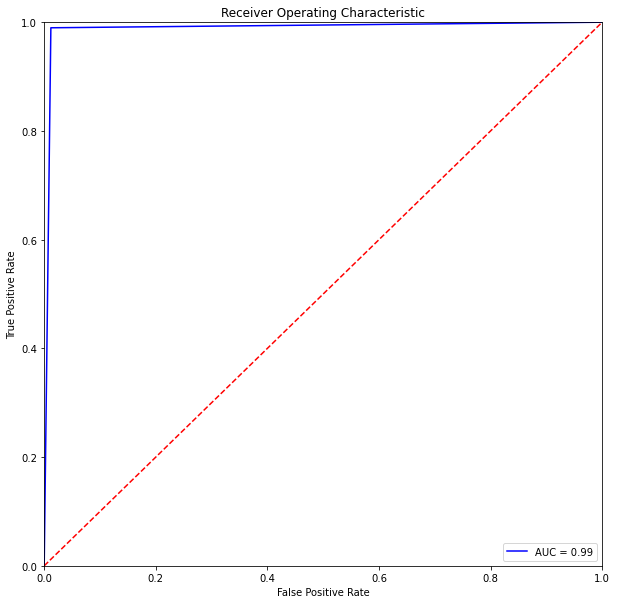

In [30]:
from sklearn import metrics
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
f, ax = plt.subplots(figsize=(10, 10))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Important Features

<AxesSubplot:>

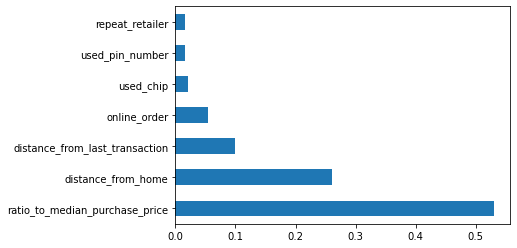

In [33]:
pd.Series(model.feature_importances_,index = X_train.columns).nlargest(10).plot(kind = 'barh')

# Export to ouputs CSV

In [35]:
final_df = X_test.copy()
final_df['Predictions'] = y_pred
final_df['Actual'] = y_test
final_df

distance_from_home  distance_from_last_transaction  \
266400            9.514502                       75.164617   
306111            4.709367                        1.302949   
277014           12.728003                        1.589893   
783385            9.765614                        1.905127   
60375            12.764087                        2.955140   
...                    ...                             ...   
15033             9.141813                        2.030421   
348622           15.030166                        0.651970   
527770           51.600236                        2.659418   
161606            2.869883                        0.008777   
579448           22.067938                        0.027248   

        ratio_to_median_purchase_price  repeat_retailer  used_chip  \
266400                        0.651121              1.0        0.0   
306111                        0.974099              1.0        1.0   
277014                        1.669706              1.0        1.0   
783385                        2.218792              1.0        0.0   
60375                         0.598912              1.0        0.0   
...                                ...              ...        ...   
15033                         0.815235              1.0        0.0   
348622                        0.740004              1.0        0.0   
527770                        2.963501              1.0        1.0   
161606                        1.635129              1.0        0.0   
579448                        1.007562              1.0        0.0   

        used_pin_number  online_order  Predictions  Actual  
266400              0.0           1.0          1.0     1.0  
306111              0.0           1.0          0.0     0.0  
277014              0.0           1.0          0.0     0.0  
783385              0.0           1.0          0.0     0.0  
60375               0.0           1.0          0.0     0.0  
...                 ...           ...          ...     ...  
15033               0.0           1.0          0.0     0.0  
348622              1.0           1.0          0.0     0.0  
527770              1.0           1.0          0.0     0.0  
161606              1.0           1.0          0.0     0.0  
579448              0.0           1.0          0.0     0.0  

[200000 rows x 9 columns]

In [38]:
#df_predict_credit_card_fraud = pd.DataFrame(final_df)
#file_name = r'C:\Users\apopalzi\Documents\git\apf\output\fraud\predict_credit_card_fraud_GBoost\predict_credit_card_fraud_GBoost.csv'
#df_predict_credit_card_fraud.to_csv(file_name,encoding='utf-8', index=False)